## EXL_EQ_2019 question statement :
# Also, build model considering that it should be able to answer following questions:
 Q1. [Is there any certain time period during year/month/week during which there are more fraud claims?](#1)
 
 Q2. [Form a criteria based on the Policy holder’s personal information like age, sex etc. to determine fraudulent claims?](#2)
 
 Q3. [What pattern can be drawn on amounts like Vehicle price, Claim Amount etc. from past fraud behaviors?](#3)
 
 Q4. [How does past number of claims, police report filed, and witness present, Policy type effect the chances of claim to fraud?](#3)

# XYZ has provided you the data with following information:
 • Policy Holder Personal data: Sex, Marital Status, Age etc.
 
 • Policy data: Policy Number, Policy Type, Deductible etc.
 
 • Claim data: Accident Area, Claim Date, Fault etc.
 
 • Vehicle data: Make, Vehicle category, Vehicle Price etc.

# Assumptions
- Month , Year in data refers to month and year of accident

## TODOS:
- unique values proportions and data
- deal with the null values
- similarity and disimilarity of the 2 classes
- remove useless features
- compare models using ROC curve as its independent of the probability threshold
- cost function
- the data is skewed but does it has conflicting points or is it separable
- check in the test data for the year and the other temporal details
- scaling for deductible amount

# Models: tweak the probabilities might help
- SVM - AS ONLY THE SUPPORT VECTORS EFFECT THE DECISION BOUNDARY AND NOT THE DISTRIBUTION OF THE DATA
- DECISION TREE - AS BASED ON HUMAN THINKING
- CLUSTERING - HIERARCHICAL (DENDOGRAM, hyperparameters - similarity criteria, cosine similarity)
- ENSEMBLING - MAY BE THE QUARRELING BOUNDARY IS BETWEEN JUST SOME POINTS OF EACH GROUP

In [696]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [609]:
pd.options.display.max_columns = 40
pd.options.display.max_rows = 50
pd.options.display.max_colwidth = 80

In [610]:
def get_pivot(value, index, column , df):
    pivot = df.pivot_table(values = value,index= index, columns = column 
               , aggfunc='count', fill_value = 0, margins = True)

    pivot["Percent_Fraud"] = ( pivot[1] / pivot["All"] )*100
    return pivot

In [829]:
df = pd.read_excel("Dataset.xlsx")

# 1. <a id='null_values'>TYPE OF DATA & NULL VALUES</a>

In [612]:
df.info()
#Age(5) and DriverRating(6) has null values all these rows are of the FraudFound_P = 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
Month                   11565 non-null object
WeekOfMonth             11565 non-null int64
DayOfWeek               11565 non-null object
Make                    11565 non-null object
AccidentArea            11565 non-null object
DayOfWeekClaimed        11565 non-null object
MonthClaimed            11565 non-null object
WeekOfMonthClaimed      11565 non-null int64
Sex                     11565 non-null object
MaritalStatus           11565 non-null object
Age                     11560 non-null float64
Fault                   11565 non-null object
PolicyType              11565 non-null object
VehicleCategory         11565 non-null object
VehiclePrice            11565 non-null object
FraudFound_P            11565 non-null int64
PolicyNumber            11565 non-null int64
RepNumber               11565 non-null int64
Deductible              11565 non-null int64
DriverRating          

In [613]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     5
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            6
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

In [616]:
df.loc[df.isnull().any(axis = 1)]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
14,May,4,Thursday,Pontiac,Urban,Monday,May,5,Male,Single,32.0,Policy Holder,Sedan - Liability,Sport,20000 to 29000,0,19,6,400,NaN,more than 30,more than 30,1,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Liability,5906.597313
23,Jan,4,Monday,Honda,Urban,Tuesday,Jan,4,Male,Single,NaN,Third Party,Sedan - Collision,Sedan,20000 to 29000,0,34,2,400,4.0,more than 30,more than 30,none,6 years,31 to 35,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,8839.114262
83,May,2,Monday,Pontiac,Urban,Thursday,May,2,Male,Single,NaN,Policy Holder,Sedan - All Perils,Sedan,20000 to 29000,0,112,6,400,3.0,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,All Perils,6061.026279
2510,Dec,4,Tuesday,Mazda,Urban,Tuesday,Dec,4,Female,Single,33.0,Policy Holder,Sedan - Liability,Sport,20000 to 29000,0,3332,5,400,NaN,more than 30,more than 30,2 to 4,4 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Liability,1141.334386
4659,Oct,1,Sunday,Pontiac,Urban,Monday,Oct,1,Female,Single,39.0,Policy Holder,Sedan - Liability,Sport,less than 20000,0,6227,13,400,NaN,more than 30,more than 30,2 to 4,6 years,36 to 40,No,No,External,more than 5,no change,1 vehicle,1995,Liability,4873.605254
5015,Aug,2,Monday,Honda,Urban,Friday,Aug,2,Male,Single,NaN,Policy Holder,Sedan - All Perils,Sedan,less than 20000,0,6685,4,400,1.0,more than 30,more than 30,2 to 4,more than 7,51 to 65,No,No,External,more than 5,no change,1 vehicle,1995,All Perils,6887.936616
7374,Sep,1,Thursday,Toyota,Urban,Thursday,Sep,2,Male,Married,61.0,Policy Holder,Sedan - Liability,Sport,20000 to 29000,0,9843,10,400,NaN,more than 30,more than 30,more than 4,more than 7,51 to 65,No,No,External,more than 5,no change,1 vehicle,1995,Liability,11291.559600
8522,Sep,1,Sunday,Toyota,Urban,Tuesday,Sep,1,Male,Married,NaN,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,0,11341,11,400,3.0,more than 30,more than 30,none,7 years,51 to 65,No,No,External,none,4 to 8 years,2 vehicles,1996,Collision,3106.304085
9557,Aug,2,Thursday,Mazda,Urban,Tuesday,Aug,3,Male,Single,28.0,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,12741,4,400,NaN,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,1 year,1 vehicle,1996,All Perils,15604.825534
10259,Jan,4,Wednesday,Pontiac,Urban,Friday,Feb,3,Male,Married,NaN,Policy Holder,Sedan - Liability,Sport,20000 to 29000,0,13681,15,400,3.0,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Liability,1923.579892


In [11]:
df.shape

(11565, 34)

In [12]:
df.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339
5,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,30.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,9,7,400,4.0,more than 30,more than 30,none,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision,57166.760954
6,Mar,2,Sunday,Mazda,Urban,Wednesday,Mar,3,Male,Single,71.0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,11,7,400,3.0,more than 30,more than 30,none,more than 7,over 65,No,No,External,none,no change,1 vehicle,1994,All Perils,62624.228715
7,Mar,5,Monday,Honda,Urban,Monday,Mar,5,Male,Married,52.0,Policy Holder,Sedan - Liability,Sport,20000 to 29000,0,12,13,400,1.0,more than 30,more than 30,2 to 4,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1994,Liability,103420.785275
8,Jan,3,Friday,Ford,Urban,Friday,Jan,3,Male,Married,28.0,Policy Holder,Sedan - Liability,Sport,more than 69000,0,13,11,400,1.0,more than 30,more than 30,1,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Liability,59747.549439
9,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,0.0,Third Party,Sedan - Collision,Sedan,more than 69000,0,14,12,400,3.0,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,82211.859262


# 2. <a id='validation'> VALIDATION OF DATA & REMOVING USELESS FEATURES </a>

In [830]:
#no duplicates
df.drop_duplicates().shape

(11565, 34)

In [831]:
#proportion of data in the Y classes
Counter(df["FraudFound_P"])

Counter({0: 10880, 1: 685})

## 2.1 <a id='distribution'>DISTRIBUTION OF DATA </a>

In [15]:
df.groupby(["AccidentArea", "FraudFound_P"]).agg({"FraudFound_P":"count","Month":"nunique", "MonthClaimed":"nunique"})

FraudFound_P  Month  MonthClaimed
AccidentArea FraudFound_P                                   
Rural        0                     1111     12            13
             1                       98     12            12
Urban        0                     9769     12            12
             1                      587     12            12

In [13]:
#counter of data in the two classes

In [142]:
Counter(df.aggregate(["nunique"]).T["nunique"])
#2: 7 represents that we have 7 features that have 2 unique values and so on like we only single features
#for which have 12, 13, 16, 19, 66, 3332, 11565 unique values

Counter({2: 7,
         3: 4,
         4: 6,
         5: 4,
         6: 1,
         7: 3,
         8: 1,
         9: 2,
         12: 2,
         13: 1,
         16: 1,
         19: 1,
         66: 1,
         3332: 1})

In [17]:
pd.concat([df.groupby("FraudFound_P").agg(["nunique"]).T.unstack(), 
          df.aggregate(["nunique","unique"]).T], 
          axis =1).sort_values(by = "nunique")
#(0, nunique) = number of unique values in parameters that belong to FraudFound_P = 0
#(1, nunique) = number of unique values in parameters that belong to FraudFound_P = 1
#nunique = total number of the unique values that the parameters contains 
#and unique lists all those unique values

,"(0, nunique)","(1, nunique)",nunique,unique
AccidentArea,2.0,2.0,2,"[Urban, Rural]"
Sex,2.0,2.0,2,"[Female, Male]"
PoliceReportFiled,2.0,2.0,2,"[No, Yes]"
WitnessPresent,2.0,2.0,2,"[No, Yes]"
AgentType,2.0,2.0,2,"[External, Internal]"
FraudFound_P,NaN,NaN,2,"[0, 1]"
Fault,2.0,2.0,2,"[Policy Holder, Third Party]"
VehicleCategory,3.0,3.0,3,"[Sport, Sedan, Utility]"
Year,3.0,3.0,3,"[1994, 1995, 1996]"
BasePolicy,3.0,3.0,3,"[Liability, Collision, All Perils]"


### Insights
### These parameters shows some distinction in  FraudFound_P as not all their values are present in Fraud and valid
- NumberOfCars
- PolicyType
- Make
## Others
- Days_Policy_Claim and Days_Policy_Accident have 'none' values
- monthcalimed and dayofweekclaimed has 0 value
- PolicyNumber is useless

In [832]:
df[df["Days_Policy_Accident"] == 'none']
# total = 39 out of which 6 belongs to FraudFound_P = 1
# filling none values from Days_Policy_Accident
df.loc[df["Days_Policy_Accident"] == 'none', "Days_Policy_Accident"] = df["Days_Policy_Claim"]

In [833]:
df[df["Days_Policy_Claim"] == 'none']
#just one column and it belongs to FraudFound_P = 0 therefore remove it

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
1146,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0.0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,1517,15,400,2.0,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,70530.646951


In [834]:
df[df["MonthClaimed"] == 0]
#it also has df[df["DayOfWeekClaimed"] == 0]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
1146,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,0.0,Policy Holder,Sedan - All Perils,Sedan,more than 69000,0,1517,15,400,2.0,more than 30,none,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,70530.646951


In [835]:
df.drop(df[df["Days_Policy_Claim"] == 'none'].index, inplace = True)
df.drop(df[df["MonthClaimed"] == 0].index, inplace = True)
df.drop(["PolicyNumber"], axis = 1, inplace = True)

## difference between claimed and normal temporal data
## features considered : 
#### Month, MonthClaimed, Year, Days_Policy_Claim, Days_Policy_Accident, 
#### WeekOfMonth, DayOfWeek, DayOfWeekClaimed, WeekOfMonthClaimed

### consider new features :
#### ClaimDelayIntervalMonth, difference between Days_Policy_Claim and Days_Policy_Accident

In [623]:
df[df["Month"] == df["MonthClaimed"]].shape , df[df["Month"] != df["MonthClaimed"]].shape

((8588, 33), (2976, 33))

In [624]:
df[df["WeekOfMonth"] == df["WeekOfMonthClaimed"]].shape , df[df["WeekOfMonth"] != df["WeekOfMonthClaimed"]].shape

((5271, 33), (6293, 33))

In [625]:
df[df["DayOfWeek"] == df["DayOfWeekClaimed"]].shape , df[df["DayOfWeek"] != df["DayOfWeekClaimed"]].shape

((2280, 33), (9284, 33))

In [626]:
df[df["Days_Policy_Accident"] == df["Days_Policy_Claim"]].shape , df[df["Days_Policy_Accident"] != df["Days_Policy_Claim"]].shape

((11495, 33), (69, 33))

In [836]:
month_num = {'Dec': 12,
 'Jan':1,
 'Oct':10,
 'Jun':6,
 'Feb':2,
 'Mar':3,
 'Aug':8,
 'Apr':4,
 'Jul':7,
 'May':5,
 'Sep':9,
 'Nov':11}

week_num = {'Wednesday' : 4,
            'Friday': 6,
            'Saturday': 7,
            'Sunday': 1,
            'Monday': 2,
            'Tuesday' : 3,
            'Thursday': 5}

In [837]:
df["DayOfWeek"] = df["DayOfWeek"].apply(lambda x: week_num[x])
df["Month"] = df["Month"].apply(lambda x: month_num[x])
df["MonthClaimed"] = df["MonthClaimed"].apply(lambda x: month_num[x])

# Error   -what if the user applies after one year 
### -here we are limiting the delay between claim and accident is assumed to be atmost 11 months
- Days_Policy_Claim and Days_Policy_Accident can be used 

### -difference for those who apply exactly after one  month and one year.

In [838]:
df[df["MonthClaimed"] - df["Month"]  < 0].loc[:,[ "MonthClaimed","Month","Year", "FraudFound_P"]]
# Year belongs to Month and lets assume if df["MonthClaimed"] - df["Month"]  < 0 then 'yearClaimed = Year + 1'
# 30/396 such cases are FraudFound_P = 1

,MonthClaimed,Month,Year,FraudFound_P
0,1,12,1994,0
37,1,7,1994,1
45,1,9,1994,0
46,1,11,1994,0
49,1,12,1994,0
56,1,9,1994,0
59,1,10,1994,0
64,2,11,1994,0
65,1,12,1994,0
66,3,12,1994,0


# TESTING FOR CLAIM DELAY

In [839]:
negative_delay_month = df[df["MonthClaimed"] - df["Month"]  < 0]
zero_delay_month = df[df["MonthClaimed"] - df["Month"]  == 0]

In [840]:
(Counter(zero_delay_month["Days_Policy_Claim"]), Counter(zero_delay_month["Days_Policy_Accident"]))
#when days_policy_claim > 30 and Month == MonthClaimed then CalimDelayMonthInterval = 12

(Counter({'15 to 30': 40, '8 to 15': 8, 'more than 30': 8540}),
 Counter({'1 to 7': 4, '15 to 30': 29, '8 to 15': 31, 'more than 30': 8524}))

In [841]:
Counter(negative_delay_month["Days_Policy_Claim"]) ,Counter(negative_delay_month["Days_Policy_Accident"]) 

(Counter({'more than 30': 396}),
 Counter({'15 to 30': 3, '8 to 15': 1, 'more than 30': 392}))

In [842]:
#REPLACING DAYS_POLICY_ACCIDENT TO 'more than 30' for which CalimDelayMonthInterval is negative
df.loc[ (df["MonthClaimed"] - df["Month"]  < 0 ) & (df["Days_Policy_Accident"] != 'more than 30'), 
       "Days_Policy_Accident"] = 'more than 30'

In [843]:
df.loc[df["Days_Policy_Accident"] != df["Days_Policy_Claim"], ["Days_Policy_Claim", "Days_Policy_Accident", "FraudFound_P"]]

,Days_Policy_Claim,Days_Policy_Accident,FraudFound_P
164,more than 30,15 to 30,0
291,more than 30,1 to 7,0
415,15 to 30,8 to 15,0
591,more than 30,15 to 30,0
623,15 to 30,1 to 7,0
719,8 to 15,1 to 7,1
768,more than 30,1 to 7,0
878,15 to 30,8 to 15,0
1018,15 to 30,1 to 7,0
1200,15 to 30,8 to 15,1


In [844]:
Counter(df["Days_Policy_Accident"])

Counter({'1 to 7': 11, '15 to 30': 37, '8 to 15': 47, 'more than 30': 11469})

In [845]:
#encoding Days_Policy_Accident and Days_Policy_Claim by their means
Days_Policy_Claim_Accident_code = {'1 to 7': 4,
                                   '8 to 15':12,
                                   '15 to 30': 23,
                                   'more than 30': 50}

In [846]:
df["Days_Policy_Accident"] = df["Days_Policy_Accident"].apply(lambda x : Days_Policy_Claim_Accident_code[x])
df["Days_Policy_Claim"] = df["Days_Policy_Claim"].apply(lambda x : Days_Policy_Claim_Accident_code[x])

# If the intution is correct that Days_Policy_Claim >= Days_Policy_Accident then these 3 rows need to be corrected

In [847]:
w_index = df.loc[df["Days_Policy_Claim"] < df["Days_Policy_Accident"], 
       ["Month", "MonthClaimed", "ClaimDelayIntervalMonth","Days_Policy_Claim", "Days_Policy_Accident"]].index

df.loc[df["Days_Policy_Claim"] < df["Days_Policy_Accident"], 
       ["Month", "MonthClaimed", "Days_Policy_Accident","Days_Policy_Claim"]]

,Month,MonthClaimed,Days_Policy_Accident,Days_Policy_Claim
5424,5,5,50,23
10088,7,7,50,23
10362,3,3,50,23


In [848]:
#swapping the two column values for above three rows
df.loc[w_index, "Days_Policy_Accident"], df.loc[w_index, "Days_Policy_Claim"] = df.loc[w_index, "Days_Policy_Claim"], df.loc[w_index, "Days_Policy_Accident"] 
df.loc[w_index, ["Days_Policy_Accident", "Days_Policy_Claim"]]

,Days_Policy_Accident,Days_Policy_Claim
5424,23,50
10088,23,50
10362,23,50


In [849]:
df["ClaimDelayIntervalMonth"] = df["MonthClaimed"] - df["Month"]
df["ClaimDelayIntervalMonth"] = df["ClaimDelayIntervalMonth"].apply(lambda x: x if x >= 0 else x + 12)
df.loc[ (df["Days_Policy_Claim"] > 30 ) & (df["ClaimDelayIntervalMonth"] == 0) , "ClaimDelayIntervalMonth"] = 12
Counter(df["ClaimDelayIntervalMonth"])

Counter({0: 45,
         1: 2402,
         2: 304,
         3: 107,
         4: 53,
         5: 28,
         6: 23,
         7: 25,
         8: 13,
         9: 10,
         10: 6,
         11: 5,
         12: 8543})

# Discrepancy with this result.

In [851]:
get_pivot("AccidentArea", "ClaimDelayIntervalMonth", "FraudFound_P", df)
#TOP DELAYS IN TERMS OF FRAUD ARE - 12, 1, 2
#ALTHOUGH THESE ARE A;SO THE DELAYS WHERE THE TOTAL NUMBER(ALL) OF CLAIMS ARE MOST

FraudFound_P,0,1,All,Percent_Fraud
ClaimDelayIntervalMonth,,,,
0,43.0,2.0,45.0,4.444444
1,2231.0,171.0,2402.0,7.119067
2,272.0,32.0,304.0,10.526316
3,102.0,5.0,107.0,4.672897
4,49.0,4.0,53.0,7.547170
5,25.0,3.0,28.0,10.714286
6,21.0,2.0,23.0,8.695652
7,25.0,0.0,25.0,0.000000
8,11.0,2.0,13.0,15.384615


# DifferenceBtwnDaysClaimAccident

In [852]:
df["DifferenceBtwnDaysClaimAccident"] = df["Days_Policy_Claim"] - df["Days_Policy_Accident"]

In [853]:
Counter(df["DifferenceBtwnDaysClaimAccident"])

Counter({0: 11499, 8: 1, 11: 17, 19: 6, 27: 19, 38: 18, 46: 4})

In [854]:
get_pivot("AccidentArea", "DifferenceBtwnDaysClaimAccident", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
DifferenceBtwnDaysClaimAccident,,,,
0,10821.0,678.0,11499.0,5.896165
8,0.0,1.0,1.0,100.000000
11,15.0,2.0,17.0,11.764706
19,6.0,0.0,6.0,0.000000
27,17.0,2.0,19.0,10.526316
38,16.0,2.0,18.0,11.111111
46,4.0,0.0,4.0,0.000000
All,10879.0,685.0,11564.0,5.923556


# useless feature

In [855]:
get_pivot("AccidentArea", "Year", "FraudFound_P", df)
#the number of claims are decreasing per year
#percent fraud per year is also decreasing
#but the decrease fraud claims is rapid

FraudFound_P,0,1,All,Percent_Fraud
Year,,,,
1994,4284.0,311.0,4595.0,6.768226
1995,3704.0,219.0,3923.0,5.582462
1996,2891.0,155.0,3046.0,5.088641
All,10879.0,685.0,11564.0,5.923556


In [856]:
get_pivot("Year", "AccidentArea", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
AccidentArea,,,,
Rural,1110.0,98.0,1208.0,8.112583
Urban,9769.0,587.0,10356.0,5.668212
All,10879.0,685.0,11564.0,5.923556


In [45]:
get_pivot("Year", "PastNumberOfClaims", "FraudFound_P", df)
#the lesser number of past claims the higher chances of being Fraud 

FraudFound_P,0,1,All,Percent_Fraud
PastNumberOfClaims,,,,
1,2510.0,165.0,2675.0,6.168224
2 to 4,3931.0,209.0,4140.0,5.048309
more than 4,1412.0,52.0,1464.0,3.551913
none,3026.0,259.0,3285.0,7.884323
All,10879.0,685.0,11564.0,5.923556


In [46]:
Counter(df["PastNumberOfClaims"])

Counter({'none': 3285, 1: 2675, '2 to 4': 4140, 'more than 4': 1464})

In [857]:
#Encoding the PastNumberOfClaims to numbers
PastNumberOfClaims_en = {'none': 0,
                         1: 1,
                         '2 to 4': 3,
                         'more than 4': 6}
df["PastNumberOfClaims"] = df["PastNumberOfClaims"].apply(lambda x: PastNumberOfClaims_en[x])

In [858]:
get_pivot("Year", "Fault", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
Fault,,,,
Policy Holder,7736.0,657.0,8393.0,7.827952
Third Party,3143.0,28.0,3171.0,0.883002
All,10879.0,685.0,11564.0,5.923556


In [101]:
get_pivot("Year", "Fault", "PastNumberOfClaims", df)

PastNumberOfClaims,0,1,3,6,All,Percent_Fraud
Fault,,,,,,
0,1088.0,839.0,1000.0,244.0,3171.0,26.458530
1,2197.0,1836.0,3140.0,1220.0,8393.0,21.875372
All,3285.0,2675.0,4140.0,1464.0,11564.0,23.132134


In [859]:
#Encodin the binary columns Fault and AccidentArea
df["Fault_PolicyHolder"] = df["Fault"].apply(lambda x: 1 if x == "Policy Holder" else 0)
df["AccidentArea_Urban"] = df["AccidentArea"].apply(lambda x: 1 if x == "Urban" else 0)

In [860]:
get_pivot("Year", "PoliceReportFiled", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
PoliceReportFiled,,,,
No,10562.0,672.0,11234.0,5.981841
Yes,317.0,13.0,330.0,3.939394
All,10879.0,685.0,11564.0,5.923556


In [861]:
df["PoliceReportFiled_Yes"] = df["PoliceReportFiled"].apply(lambda x: 1 if x == 'Yes' else 0)

In [52]:
get_pivot("Year", "WitnessPresent", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
WitnessPresent,,,,
No,10813.0,683.0,11496.0,5.941197
Yes,66.0,2.0,68.0,2.941176
All,10879.0,685.0,11564.0,5.923556


In [862]:
df["WitnessPresent_Yes"] = df["WitnessPresent"].apply(lambda x: 1 if x == 'Yes' else 0)

In [864]:
get_pivot("Year", "NumberOfSuppliments", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
NumberOfSuppliments,,,,
1 to 2,1733.0,113.0,1846.0,6.121343
3 to 5,1441.0,73.0,1514.0,4.821664
more than 5,2733.0,142.0,2875.0,4.939130
none,4972.0,357.0,5329.0,6.699193
All,10879.0,685.0,11564.0,5.923556


In [865]:
Counter(df["NumberOfSuppliments"])

Counter({'1 to 2': 1846, '3 to 5': 1514, 'more than 5': 2875, 'none': 5329})

In [866]:
supplements_en = {'none': 0,
                  '1 to 2': 1,
                  '3 to 5': 4,
                  'more than 5': 5}
df["NumberOfSuppliments"] = df["NumberOfSuppliments"].apply(lambda x: supplements_en[x])

In [867]:
get_pivot("Year", "AddressChange_Claim", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
AddressChange_Claim,,,,
1 year,120.0,8.0,128.0,6.250000
2 to 3 years,182.0,40.0,222.0,18.018018
4 to 8 years,469.0,27.0,496.0,5.443548
no change,10107.0,607.0,10714.0,5.665484
under 6 months,1.0,3.0,4.0,75.000000
All,10879.0,685.0,11564.0,5.923556


In [868]:
address_change_en = {'1 year': 1,
         '2 to 3 years': 1.5,
         '4 to 8 years': 6,
         'no change': 0,
         'under 6 months': 0.5}

df["AddressChange_Claim"] = df["AddressChange_Claim"].apply(lambda x: address_change_en[x])

In [869]:
get_pivot("Year", "AgentType", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
AgentType,,,,
External,10712.0,681.0,11393.0,5.977355
Internal,167.0,4.0,171.0,2.339181
All,10879.0,685.0,11564.0,5.923556


In [870]:
df["AgentType_Internal"] = df["AgentType"].apply(lambda x: 1 if x == 'Internal' else 0)

In [871]:
get_pivot("Year", "DriverRating", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
DriverRating,,,,
1.0,2755.0,173.0,2928.0,5.908470
2.0,2696.0,154.0,2850.0,5.403509
3.0,2750.0,178.0,2928.0,6.079235
4.0,2672.0,180.0,2852.0,6.311360
All,10873.0,685.0,11558.0,5.926631


In [872]:
df["DriverRating"].fillna(0, inplace = True)

# Others
### DriverRating, NumberOfCars

In [873]:
get_pivot("Year", "NumberOfCars", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
NumberOfCars,,,,
1 vehicle,10069.0,628.0,10697.0,5.870805
2 vehicles,522.0,37.0,559.0,6.618962
3 to 4,269.0,19.0,288.0,6.597222
5 to 8,18.0,1.0,19.0,5.263158
more than 8,1.0,0.0,1.0,0.000000
All,10879.0,685.0,11564.0,5.923556


In [874]:
num_cars_en = {'1 vehicle': 1,
         '2 vehicles': 2,
         '3 to 4': 4,
         '5 to 8': 6,
         'more than 8': 8}

df["NumberOfCars"] = df["NumberOfCars"].apply(lambda x: num_cars_en[x])

# Policy_Data
### PolicyType, , BasePolicy, RepNumber,  Deductible

#### RepNumber - The Register of Exercise Professionals (or REPs) is a government-backed system of self-regulation for all instructors, coaches, trainers and teachers involved  in the exercise and fitness industry.They provide a Code of Conduct for all Exercise Professionals to follow.

In [875]:
get_pivot("Year", "BasePolicy", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
BasePolicy,,,,
All Perils,2996.0,340.0,3336.0,10.191847
Collision,4154.0,318.0,4472.0,7.110912
Liability,3729.0,27.0,3756.0,0.718850
All,10879.0,685.0,11564.0,5.923556


In [876]:
get_pivot("Year", "PolicyType", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
PolicyType,,,,
Sedan - All Perils,2759.0,307.0,3066.0,10.013046
Sedan - Collision,3905.0,281.0,4186.0,6.712852
Sedan - Liability,3715.0,27.0,3742.0,0.721539
Sport - All Perils,19.0,0.0,19.0,0.000000
Sport - Collision,228.0,34.0,262.0,12.977099
Sport - Liability,1.0,0.0,1.0,0.000000
Utility - All Perils,218.0,33.0,251.0,13.147410
Utility - Collision,21.0,3.0,24.0,12.500000
Utility - Liability,13.0,0.0,13.0,0.000000


In [877]:
df[~df.T.apply(lambda s: s["BasePolicy"] in s["PolicyType"])]

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize,ClaimDelayIntervalMonth,DifferenceBtwnDaysClaimAccident,Fault_PolicyHolder,AccidentArea_Urban,PoliceReportFiled_Yes,WitnessPresent_Yes,AgentType_Internal


In [878]:
get_pivot("Year", "RepNumber", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
RepNumber,,,,
1,704.0,50.0,754.0,6.631300
2,676.0,38.0,714.0,5.322129
3,685.0,48.0,733.0,6.548431
4,663.0,33.0,696.0,4.741379
5,690.0,39.0,729.0,5.349794
6,652.0,51.0,703.0,7.254623
7,749.0,51.0,800.0,6.375000
8,641.0,40.0,681.0,5.873715
9,711.0,49.0,760.0,6.447368


In [881]:
get_pivot("Year", "Deductible", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
Deductible,,,,
400,10501.0,630.0,11131.0,5.659869
500,170.0,37.0,207.0,17.874396
700,208.0,18.0,226.0,7.964602
All,10879.0,685.0,11564.0,5.923556


# merge deductible = 300 with 400


In [880]:
df.loc[df["Deductible"] == 300, "Deductible"] = 400

# Vehicle Data
### Make, VehicleCategory, VehiclePrice, AgeOfVehicle, 

In [882]:
get_pivot("Year", "Make", "FraudFound_P", df)
#make a category for others,
#remember other factors are their that will resolve the ambiguity created here due to grouping
#Is their any way verify this grouping,
#what are the factors of similarity to group these values,
#may be tree or hierarchical clustering is usefull.
#Also may be variable selection method after one hot encoding will help.

FraudFound_P,0,1,All,Percent_Fraud
Make,,,,
Accura,309.0,45.0,354.0,12.711864
BMW,9.0,0.0,9.0,0.000000
Chevrolet,1178.0,75.0,1253.0,5.985634
Dodge,75.0,2.0,77.0,2.597403
Ferrari,2.0,0.0,2.0,0.000000
Ford,313.0,25.0,338.0,7.396450
Honda,2024.0,134.0,2158.0,6.209453
Jaguar,5.0,0.0,5.0,0.000000
Lexus,1.0,0.0,1.0,0.000000


In [883]:
set(df["Make"]) - set(less_cars_with_high_risk) - set(top_make)

{'Chevrolet', 'Honda', 'Mazda', 'Pontiac', 'Toyota'}

In [887]:
less_cars_with_high_risk = ["Accura", "Ford", "Mercury", "Nisson", "Saab", "Saturn"]
cars_Risk_around_5 = {'Chevrolet', 'Honda', 'Mazda', 'Pontiac', 'Toyota'}
#naman classified the make into two cats
top_make = ["Dodge", "Jaguar", "Porche","BMW", "Mecedes", "Ferrari", "Lexus", "VW"]
medium_make = ["Honda", "Toyota", "Mazda", "Chevrolet", "Ford", "Pontiac", "Mercury", "Nisson", "VW", "Acura", "Saab", "Saturn" ]

# Combining Top_Make to one class

In [889]:
df["cars_Risk_around_5"] = df["Make"].apply(lambda s: 1 if s in cars_Risk_around_5  else 0 )
df["cars_Luxury"] = df["Make"].apply(lambda s: 1 if s  in top_make else 0 )

In [891]:
get_pivot("Year", "VehicleCategory", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
VehicleCategory,,,,
Sedan,6664.0,588.0,7252.0,8.108108
Sport,3963.0,61.0,4024.0,1.515905
Utility,252.0,36.0,288.0,12.500000
All,10879.0,685.0,11564.0,5.923556


In [892]:
get_pivot("Year", "VehiclePrice", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
VehiclePrice,,,,
20000 to 29000,5782.0,330.0,6112.0,5.399215
30000 to 39000,2517.0,123.0,2640.0,4.659091
40000 to 59000,328.0,21.0,349.0,6.017192
60000 to 69000,56.0,3.0,59.0,5.084746
less than 20000,734.0,66.0,800.0,8.250000
more than 69000,1462.0,142.0,1604.0,8.852868
All,10879.0,685.0,11564.0,5.923556


In [895]:
VehiclePrice_dict_en = {
    'less than 20000': 15500,
    '20000 to 29000': 24500,
    '30000 to 39000': 34500,
    '40000 to 59000': 49500,
    '60000 to 69000': 64500,
    'more than 69000': 75000}
df["VehiclePrice"] = df["VehiclePrice"].apply(lambda s: VehiclePrice_dict_en[s])

KeyError: 75000

In [898]:
Counter(df["VehiclePrice"])

Counter({15500: 800,
         24500: 6112,
         34500: 2640,
         49500: 349,
         64500: 59,
         75000: 1604})

In [72]:
get_pivot("Year", "AgeOfVehicle", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
AgeOfVehicle,,,,
2 years,50.0,2.0,52.0,3.846154
3 years,91.0,9.0,100.0,9.000000
4 years,161.0,15.0,176.0,8.522727
5 years,930.0,60.0,990.0,6.060606
6 years,2416.0,165.0,2581.0,6.392871
7 years,4128.0,260.0,4388.0,5.925251
more than 7,2845.0,148.0,2993.0,4.944871
new,258.0,26.0,284.0,9.154930
All,10879.0,685.0,11564.0,5.923556


In [899]:
# Combining car_Age >= 6 to one class
AgeOfVehicle_dict_en = {
         'new': 0,
         '2 years': 2,
         '3 years': 3,
         '4 years': 4,
         '5 years': 5,
         '6 years': 6,
         '7 years': 7,
         'more than 7':8}
df["AgeOfVehicle"] = df["AgeOfVehicle"].apply(lambda s: AgeOfVehicle_dict_en[s]) 

In [901]:
Counter(df["AgeOfVehicle"])

Counter({0: 284, 2: 52, 3: 100, 4: 176, 5: 990, 6: 2581, 7: 4388, 8: 2993})

# Personal Data
### Sex, MaritalStatus, Age, AgeOfPolicyHolder

In [902]:
get_pivot("Year", "Sex", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
Sex,,,,
Female,1724.0,73.0,1797.0,4.062326
Male,9155.0,612.0,9767.0,6.265998
All,10879.0,685.0,11564.0,5.923556


In [903]:
df["Male"] = df["Sex"].apply(lambda s: 1 if s == "Male" else 0)

In [75]:
get_pivot("Year", "MaritalStatus", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
MaritalStatus,,,,
Divorced,58.0,3.0,61.0,4.918033
Married,7504.0,482.0,7986.0,6.035562
Single,3298.0,198.0,3496.0,5.663616
Widow,19.0,2.0,21.0,9.523810
All,10879.0,685.0,11564.0,5.923556


In [905]:
#Combining Divorced and Widow
df["MaritalStatus_Married"] = df["MaritalStatus"].apply(lambda s: 1 if s== "Married" else 0)
df["MaritalStatus_Single"] = df["MaritalStatus"].apply(lambda s: 1 if s== "Single" else 0)

In [76]:
get_pivot("Year", "Age", "FraudFound_P", df)
#impute the Age = 0 from AgeOfPolicyHolder

FraudFound_P,0,1,All,Percent_Fraud
Age,,,,
0.0,226.0,26.0,252.0,10.317460
16.0,8.0,0.0,8.0,0.000000
17.0,4.0,1.0,5.0,20.000000
18.0,30.0,4.0,34.0,11.764706
19.0,20.0,4.0,24.0,16.666667
20.0,14.0,1.0,15.0,6.666667
21.0,93.0,2.0,95.0,2.105263
22.0,79.0,8.0,87.0,9.195402
23.0,91.0,1.0,92.0,1.086957


In [916]:
get_pivot("Year", "AgeOfPolicyHolder", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
AgeOfPolicyHolder,,,,
16 to 17,220.0,26.0,246.0,10.569106
18 to 20,12.0,1.0,13.0,7.692308
21 to 25,64.0,9.0,73.0,12.328767
26 to 30,425.0,20.0,445.0,4.494382
31 to 35,3929.0,270.0,4199.0,6.430102
36 to 40,2834.0,174.0,3008.0,5.784574
41 to 50,2010.0,112.0,2122.0,5.278040
51 to 65,1017.0,53.0,1070.0,4.953271
over 65,368.0,20.0,388.0,5.154639


In [931]:
# merging the groups '16 to 17' + '18 to 20' and '21 to 25' + '26 to 30' 
df["newAgeGroupPolicyHolder"] = df["AgeOfPolicyHolder"].apply(
    lambda age_class: '16 to 20' if (age_class == '16 to 17' or age_class == '18 to 20') else age_class)

df["newAgeGroupPolicyHolder"] = df["newAgeGroupPolicyHolder"].apply(
    lambda age_class: "21 to 30" if (age_class == '21 to 25') or (age_class == '26 to 30') else age_class)

In [943]:
_ = get_pivot("Year", "newAgeGroupPolicyHolder", "FraudFound_P", df)
newAgeGroupPolicyHolder_prob_enc = dict(zip(_.index[:-1], _.Percent_Fraud[:-1]))
df["newAgeGroup_prob"] = df["newAgeGroupPolicyHolder"].apply(lambda a: newAgeGroupPolicyHolder_prob_enc[a])
print(_)

FraudFound_P                   0      1      All  Percent_Fraud
newAgeGroupPolicyHolder                                        
16 to 20                   232.0   27.0    259.0      10.424710
21 to 30                   489.0   29.0    518.0       5.598456
31 to 35                  3929.0  270.0   4199.0       6.430102
36 to 40                  2834.0  174.0   3008.0       5.784574
41 to 50                  2010.0  112.0   2122.0       5.278040
51 to 65                  1017.0   53.0   1070.0       4.953271
over 65                    368.0   20.0    388.0       5.154639
All                      10879.0  685.0  11564.0       5.923556


In [945]:
Counter(zip(df.loc[df["Age"]== 0]["Age"], df.loc[df["Age"]== 0]["AgeOfPolicyHolder"]))

Counter({(0.0, '16 to 17'): 246,
         (0.0, '31 to 35'): 2,
         (0.0, '36 to 40'): 2,
         (0.0, '41 to 50'): 2})

In [946]:
u_age = df["AgeOfPolicyHolder"].apply(lambda s: int(s[-2:]) if s[-2:].isnumeric() else float("nan"))
l_age = df["AgeOfPolicyHolder"].apply(lambda s: int(s[:2]) if s[:2].isnumeric() else float("nan"))

In [947]:
sum(l_age.isnull()), sum(u_age.isnull())

(388, 0)

In [948]:
Counter(df.loc[~(l_age.fillna(65) <= df["Age"]) & ( df["Age"] <= u_age), ["Age", "AgeOfPolicyHolder"]]["Age"])
#Number of cases where does not lie between the AgeOfPolicyHolder 
#i.e. there are 8 cases where Age = 16 and its not consistent with AgeOfPolicyholder

Counter({0.0: 252,
         16.0: 8,
         17.0: 5,
         18.0: 34,
         19.0: 24,
         20.0: 15,
         21.0: 95,
         22.0: 87,
         23.0: 92,
         24.0: 97,
         25.0: 74,
         26.0: 411,
         27.0: 390,
         28.0: 425,
         29.0: 412,
         30.0: 439})

In [949]:
mal_fun_Age = df.loc[(df["Age"]==0) | df["Age"].isnull(), "Age"].index
df.loc[mal_fun_Age, ["Age"]] = (l_age[mal_fun_Age] + u_age.fillna(65)[mal_fun_Age])/2

In [950]:
df["BasePolicy"].drop_duplicates().values

array(['Liability', 'Collision', 'All Perils'], dtype=object)

In [951]:
df["BasePolicy_Liability"] = df["BasePolicy"].apply(lambda s: 1 if s == "Liability" else 0)
df["BasePolicy_Collision"] = df["BasePolicy"].apply(lambda s: 1 if s == "Collision" else 0)

In [952]:
#One hot encoding VehicleCategory
df["VehicleCategory_Utility"] = df["VehicleCategory"].apply(lambda s: 1 if s == "Utility" else 0)
df["VehicleCategory_Sport"] = df["VehicleCategory"].apply(lambda s: 1 if s == "Sport" else 0)

# Temporal_data

In [700]:
Counter(df["Year"])

Counter({1994: 4595, 1995: 3923, 1996: 3046})

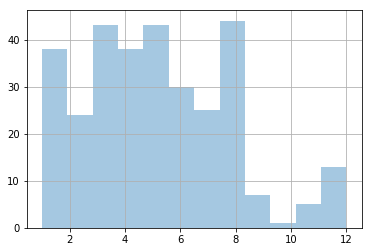

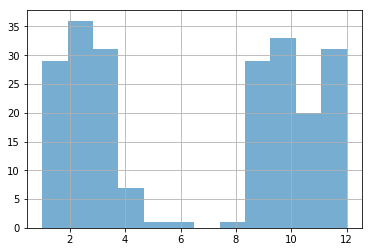

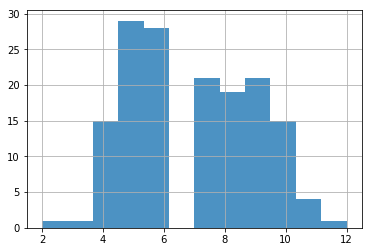

In [709]:
df.loc[(df["Year"] == 1994) & df["FraudFound_P"]==1,"Month"].(bins = 12, alpha = 0.4) #blue
plt.show()
df.loc[(df["Year"] == 1995) & df["FraudFound_P"]==1 ,"Month"].hist(bins = 12, alpha = 0.6) #orange
plt.show()
df.loc[(df["Year"] == 1996) & df["FraudFound_P"]==1 ,"Month"].hist(bins = 12, alpha = 0.8) #green
plt.show()

In [ ]:
get_pivot("AccidentArea", "Month", "FraudFound_P", df)

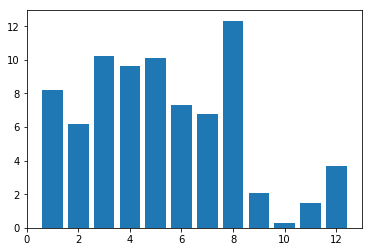

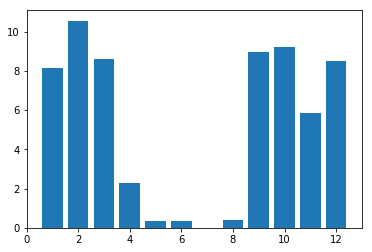

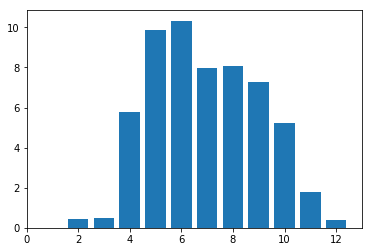

In [723]:
for i in 1994,1995,1996:
    _ = get_pivot("AccidentArea", "Month", "FraudFound_P", df.loc[df["Year"] == i])
    plt.bar(_.index[:-1], _["Percent_Fraud"][:-1])
    plt.show()

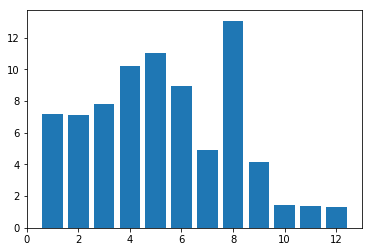

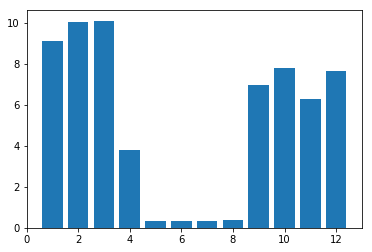

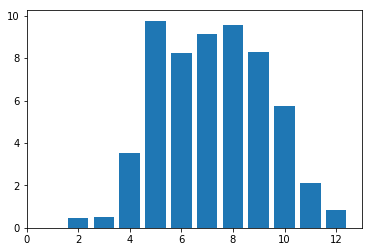

In [721]:
for i in 1994,1995,1996:
    _ = get_pivot("AccidentArea", "MonthClaimed", "FraudFound_P", df.loc[df["Year"] == i])
    plt.bar(_.index[:-1], _["Percent_Fraud"][:-1])
    plt.show()

In [975]:
df["Year_Month_prob"] = float('nan')
for i in 1994,1995,1996:
    _ = get_pivot("AccidentArea", "Month", "FraudFound_P", df.loc[df["Year"] == i])
    enc = dict(zip(_.index, _.Percent_Fraud))
    df.loc[df["Year"] == i, "Year_Month_prob"] = df.loc[df["Year"] == i, "Month"].apply(lambda s: enc[s])

df["Year_MonthClaimed_prob"] = float('nan')
for i in 1994,1995,1996:
    _ = get_pivot("AccidentArea", "MonthClaimed", "FraudFound_P", df.loc[df["Year"] == i])
    enc = dict(zip(_.index, _.Percent_Fraud))
    df.loc[df["Year"] == i, "Year_MonthClaimed_prob"] = df.loc[df["Year"] == i, "MonthClaimed"].apply(lambda s: enc[s])

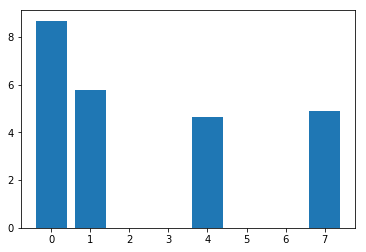

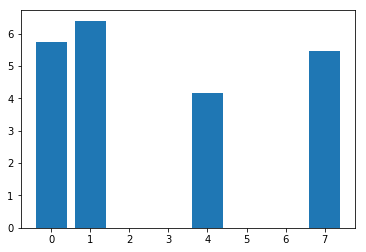

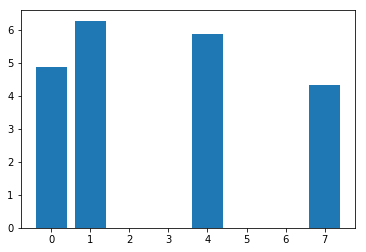

In [746]:
for i in 1994,1995,1996:
    _ = get_pivot("AccidentArea", "NumberOfSuppliments", "FraudFound_P", df.loc[df["Year"] == i])
    plt.bar(_.index[:-1], _["Percent_Fraud"][:-1])
    plt.show()

In [977]:
df["Year_Num_Of_Suppliments_prob"] = float("nan")
for i in 1994,1995,1996:
    _ = get_pivot("AccidentArea", "NumberOfSuppliments", "FraudFound_P", df.loc[df["Year"] == i])
    enc = dict(zip(_.index, _.Percent_Fraud))
    df.loc[df["Year"] == i, "Year_Num_Of_Suppliments_prob"] = df.loc[df["Year"] == i, 
                                                        "NumberOfSuppliments"].apply(lambda s: enc[s])

In [765]:
Counter(df["NumberOfCars"])

Counter({1: 10697, 2: 559, 4: 288, 6: 19, 11: 1})

FraudFound_P       0      1     All  Percent_Fraud
NumberOfCars                                      
1             3967.0  283.0  4250.0       6.658824
2              203.0   19.0   222.0       8.558559
4              105.0    9.0   114.0       7.894737
All           4275.0  311.0  4586.0       6.781509


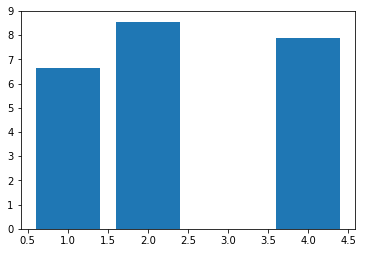

FraudFound_P       0      1     All  Percent_Fraud
NumberOfCars                                      
1             3431.0  201.0  3632.0       5.534141
2              179.0   10.0   189.0       5.291005
4               91.0    7.0    98.0       7.142857
All           3701.0  218.0  3919.0       5.562644


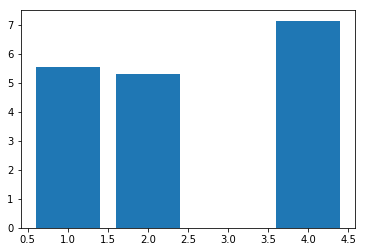

FraudFound_P       0      1     All  Percent_Fraud
NumberOfCars                                      
1             2671.0  144.0  2815.0       5.115453
2              140.0    8.0   148.0       5.405405
4               73.0    3.0    76.0       3.947368
All           2884.0  155.0  3039.0       5.100362


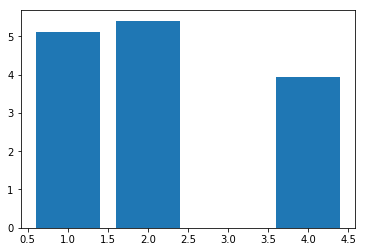

In [776]:
for i in 1994,1995,1996:
    _ = get_pivot("AccidentArea", "NumberOfCars", "FraudFound_P", df.loc[(df["Year"] == i) & (df["NumberOfCars"]<6)])
    print(_)
    plt.bar(_.index[:-1], _["Percent_Fraud"][:-1])
    plt.show()

# ????? is it good to provide with this much of info

In [811]:
liability = df[df["FraudFound_P"] == 1]

In [812]:
for i in liability.columns:
    print (i)
    print(sorted(Counter(liability[i]).most_common()), end = "\n")
    print(sorted(Counter(df[i]).most_common()), end = "\n\n\n")    

Month
[(1, 67), (2, 61), (3, 75), (4, 60), (5, 73), (6, 59), (7, 46), (8, 64), (9, 57), (10, 49), (11, 29), (12, 45)]
[(1, 1056), (2, 949), (3, 995), (4, 959), (5, 1028), (6, 981), (7, 937), (8, 851), (9, 952), (10, 973), (11, 913), (12, 970)]


WeekOfMonth
[(1, 145), (2, 165), (3, 169), (4, 131), (5, 75)]
[(1, 2389), (2, 2680), (3, 2750), (4, 2529), (5, 1216)]


DayOfWeek
[(1, 90), (2, 121), (3, 94), (4, 75), (5, 91), (6, 118), (7, 96)]
[(1, 1332), (2, 1999), (3, 1737), (4, 1565), (5, 1624), (6, 1838), (7, 1469)]


Make
[('Accura', 45), ('Chevrolet', 75), ('Dodge', 2), ('Ford', 25), ('Honda', 134), ('Mazda', 91), ('Mecedes', 1), ('Mercury', 4), ('Nisson', 1), ('Pontiac', 150), ('Saab', 6), ('Saturn', 4), ('Toyota', 141), ('VW', 6)]
[('Accura', 354), ('BMW', 9), ('Chevrolet', 1253), ('Dodge', 77), ('Ferrari', 2), ('Ford', 338), ('Honda', 2158), ('Jaguar', 5), ('Lexus', 1), ('Mazda', 1724), ('Mecedes', 3), ('Mercury', 68), ('Nisson', 22), ('Pontiac', 2899), ('Porche', 3), ('Saab', 70), 

In [809]:
get_pivot("Year", "VehiclePrice", "FraudFound_P", df)

FraudFound_P,0,1,All,Percent_Fraud
VehiclePrice,,,,
15000,734.0,66.0,800.0,8.250000
24500,5782.0,330.0,6112.0,5.399215
34500,2517.0,123.0,2640.0,4.659091
49500,328.0,21.0,349.0,6.017192
64500,56.0,3.0,59.0,5.084746
75000,1462.0,142.0,1604.0,8.852868
All,10879.0,685.0,11564.0,5.923556


In [800]:
Counter(df["Deductible"])

Counter({300.0: 4, 400.0: 11127, 500.0: 207, 700.0: 226})

# remove policytype , categorize VehiclePrice, categorize monthdelayinterval

# correlation between features

In [243]:
df.groupby(["VehicleCategory", "Make"]).agg("count")[["Month"]]

Month
VehicleCategory Make            
Sedan           Accura       227
                BMW            6
                Chevrolet    738
                Dodge         45
                Ford         215
                Honda       1205
                Jaguar         3
                Lexus          1
                Mazda        991
                Mecedes        3
                Mercury       49
                Nisson        13
                Pontiac     1935
                Saab          55
                Saturn        34
                Toyota      1604
                VW           128
Sport           Accura        75
                BMW            3
                Chevrolet    419
                Dodge         32
                Ford          96
                Honda        947
                Jaguar         2
                Mazda        706
                Mercury       13
                Nisson         5
                Pontiac      899
                Porche         2
                Saab          15
                Saturn         7
                Toyota       712
                VW            91
Utility         Accura        52
                Chevrolet     96
                Ferrari        2
                Ford          27
                Honda          6
                Mazda         27
                Mercury        6
                Nisson         4
                Pontiac       65
                Porche         1
                Toyota         1
                VW             1

# PolicyType is redundant on basis of base policy and VehicleCategory

In [982]:
#Deductible = Deductible / 100
useless_features = ["PolicyNumber"]
redundant_features = ["PolicyType"]
features_to_drop = ["Month", "WeekOfMonth", "DayOfWeek", "DayOfWeekClaimed", "MonthClaimed", "WeekOfMonthClaimed",
                    "Days_Policy_Accident", "Days_Policy_Claim", "AgeOfPolicyHolder", "Year"]
new_prob_features = ["Year_MonthClaimed_prob", "Year_Month_prob", "newAgeGroup_prob", 
                     "Year_Num_Of_Suppliments_prob" ]
new_features = ["ClaimDelayIntervalMonth","DifferenceBtwnDaysClaimAccident"]
other_features = ["PastNumberOfClaims", "DriverRating", "PoliceReportFiled_Yes", "WitnessPresent_Yes", "AgentType_Internal", 
                  "AddressChange_Claim", "NumberOfCars", "AccidentArea_Urban", "Year"]
claim_and_policy_data = ["ClaimSize", "BasePolicy_Liability", "BasePolicy_Collision"]
vehicle_features = ["VehicleCategory_Utility", "VehicleCategory_Sport", "VehiclePrice", "AgeOfVehicle", 
                    "Fault_PolicyHolder", "cars_Luxury", "cars_Risk_around_5"]
personal_features = ["Male","MaritalStatus_Married", "MaritalStatus_Single","Age"]
unknown_features = ["RepNumber", "Deductible", "NumberOfSuppliments"]
one_hot_encoded = {"BasePolicy":["BasePolicy_Liability", "BasePolicy_Collision"],
                  "VehicleCategory" : ["VehicleCategory_Utility", "VehicleCategory_Sport"],
                  "Make":["cars_Risk_around_5", "cars_Luxury"],
                  "Sex": ["Male"],
                  "MaritalStatus":["MaritalStatus_Married", "MaritalStatus_Single"],
                  "AgentType": ["AgentType_Internal"], 
                  "Fault":["Fault_PolicyHolder"],
                  "AccidentArea": ["AccidentArea_Urban"]}


features_for_tree = list()
features_for_tree.extend(new_prob_features)
features_for_tree.extend(new_features)
features_for_tree.extend(other_features)
features_for_tree.extend(claim_and_policy_data)
features_for_tree.extend(vehicle_features)
features_for_tree.extend(unknown_features)
features_for_tree.extend(personal_features)

## set(df.columns) - set(features_for_tree)

In [963]:
features_distribution = {
    "useless_features": useless_features,
    "redundant_features": redundant_features,
    "features_to_drop": features_to_drop,
    "new_features": new_features,
    "other_features": other_features      ,           
    "claim_and_policy_data": claim_and_policy_data,
    "vehicle_features": vehicle_features,
    "unknown_features": unknown_features,
    "personal_features": personal_features,
    "new_prob_features": new_prob_features
}

In [976]:
df[features_for_tree].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11564 entries, 0 to 11564
Data columns (total 31 columns):
Year_MonthClaimed_prob             11564 non-null float64
Year_Month_prob                    11564 non-null float64
newAgeGroup_prob                   11564 non-null float64
Year_Num_Of_Suppliments_prob       11564 non-null object
ClaimDelayIntervalMonth            11564 non-null int64
DifferenceBtwnDaysClaimAccident    11564 non-null int64
PastNumberOfClaims                 11564 non-null int64
DriverRating                       11564 non-null float64
PoliceReportFiled_Yes              11564 non-null int64
WitnessPresent_Yes                 11564 non-null int64
AgentType_Internal                 11564 non-null int64
AddressChange_Claim                11564 non-null float64
NumberOfCars                       11564 non-null int64
AccidentArea_Urban                 11564 non-null int64
ClaimSize                          11564 non-null float64
BasePolicy_Liability               115

In [978]:
# df.to_csv("data_new.csv")